In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ccn_model(eta_star, beta, alpha):
    return (1 - beta - alpha)*eta_star + alpha

def ccn_model_inv(eta, beta, alpha):
    return (eta - alpha)/(1 - beta - alpha)

# def eta(x):
#     return .5 + .5 * np.sin(2.9*x + .1)

def eta(x):
    return x

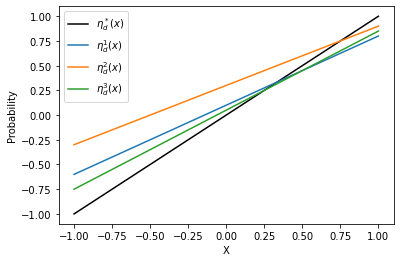

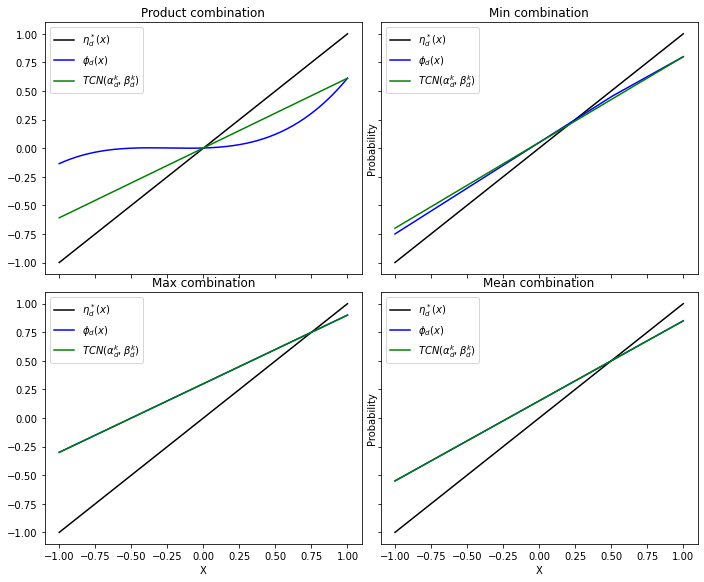

In [3]:
xmin, xmax, d = -1, 1, 0
x = np.linspace(-1,1, num=200)
y_star = eta(x)

eta_1 = ccn_model(eta(x), beta=.2, alpha=.1)
eta_2 = ccn_model(eta(x), beta=.1, alpha=.3)
eta_3 = ccn_model(eta(x), beta=.15, alpha=.05)

eta_min = np.min([eta_1, eta_2, eta_3], axis=0)
eta_max = np.max([eta_1, eta_2, eta_3], axis=0)
eta_mean = np.mean([eta_1, eta_2, eta_3], axis=0)
eta_prod = np.prod([eta_1, eta_2, eta_3], axis=0)


eta_star_max_x = .25
eta_star_min_x = -.75

plt.plot(x, y_star, label='$\eta^*_d(x)$', color='k')
plt.plot(x, eta_1, label=r"$\eta^1_d(x)$ ")
plt.plot(x, eta_2, label='$\eta^2_d(x)$')
plt.plot(x, eta_3, label='$\eta^3_d(x)$')
plt.legend()
plt.xlabel('X')
plt.ylabel('Probability')
plt.savefig('cpps.png', dpi=400)


fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,8))
ax[0][0].plot(x, y_star, label='$\eta^*_d(x)$', color='k')
ax[0][0].plot(x, eta_prod, label='$\phi_d(x)$', color='blue')
eta_prime = ccn_model(eta(x), beta=.388, alpha=.0015)
ax[0][0].plot(x, eta_prime, label=r"$TCN(\alpha_d^k, \beta_d^k)$", color='green')
ax[0][0].set_title('Product combination')
ax[0][0].legend()
plt.tight_layout()


ax[0][1].plot(x, y_star, label='$\eta^*_d(x)$', color='k')
ax[0][1].plot(x, eta_min, label='$\phi_d(x)$', color='blue')
eta_prime = ccn_model(eta(x), beta=.2, alpha=.05)
ax[0][1].plot(x, eta_prime, label=r"$TCN(\alpha_d^k, \beta_d^k)$", color='green')
ax[0][1].set_title('Min combination')
ax[0][1].set_ylabel('Probability')
ax[0][1].legend()

ax[1][0].plot(x, y_star, label='$\eta^*_d(x)$', color='k')
ax[1][0].plot(x, eta_max, label=r'$\phi_d(x)$', color='blue')
eta_prime = ccn_model(eta(x), beta=.1, alpha=.3)
ax[1][0].plot(x, eta_prime, label=r"$TCN(\alpha_d^k, \beta_d^k)$", color='green')
ax[1][0].set_title('Max combination')
ax[1][0].set_xlabel('X')
ax[1][0].legend()

ax[1][1].plot(x, y_star, label='$\eta^*_d(x)$', color='k')
ax[1][1].plot(x, eta_mean, label=r'$\phi_d(x)$',color='blue' )
eta_prime = ccn_model(eta(x), beta=.15, alpha=.15)
ax[1][1].plot(x, eta_prime, label=r"$TCN(\alpha_d^k, \beta_d^k)$", color='green')
ax[1][1].set_title('Mean combination')
ax[1][1].set_xlabel('X')
ax[1][1].set_ylabel('Probability')
ax[1][1].legend()


plt.savefig('transforms.png', dpi=400)



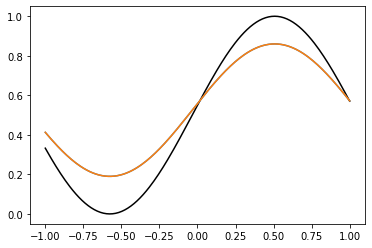

In [8]:
xmin=-1
xmax=1
d=0

x = np.linspace(-1,1, num=200)
y_star = eta(x)


eta_1 = ccn_model(eta(x), beta=.2, alpha=.1)
eta_2 = ccn_model(eta(x), beta=.1, alpha=.3)
eta_3 = ccn_model(eta(x), beta=.15, alpha=.05)


w1 = .3
w2 = .5
w3 = .2

beta_prime = w1*.2 + w2*.1 + w3*.15
alpha_prime = w1*.1 + w2*.3 + w3*.05


eta_mean = np.sum([w1*eta_1, w2*eta_2, w3*eta_3], axis=0)

eta_prime = ccn_model(eta(x), beta=beta_prime, alpha=alpha_prime)

plt.figure()
plt.plot(x, y_star, label='$\eta^*_d(x)$', color='k')
plt.plot(x, eta_mean, label=r'$\bar{\eta}_d(x)$')

plt.plot(x, eta_prime, label="$\eta^{'}_d(x)$")
# ax[1][0].set_title('Mean combination')
# ax[1][0].set_xlabel('X')
# ax[1][0].set_ylabel('Probability')
# ax[1][0].legend()
